In [1]:
# This notebook illustrates the halfar ice model

# Import funman related code
import os
from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict
from funman.api.run import Runner

RESOURCES = os.path.join(
   os.getcwd(), "../../resources"
)
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "halfar")
MODEL_PATH = os.path.join(EXAMPLE_DIR, "halfar.json")
REQUEST_PATH = os.path.join(EXAMPLE_DIR, "halfar_request.json")


def summarize_results(variables, results):
   points = results.points()
   boxes = results.parameter_space.boxes()

   print(
      f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
   )
   if points and len(points) > 0:
      point: Point = points[-1]
      parameters: Dict[Parameter, float] = results.point_parameters(point)
      results.plot(variables=variables, label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Height", legend=variables,label_color={"true": "g", "false":"r"})
      parameter_values = { p:point.values[p.name] for p in parameters}
      print(f"Parameters = {parameter_values}")
      print(parameters)
      print(results.dataframe([point]))
   else:
      # if there are no points, then we have a box that we found without needing points
      print(f"Found box with no points")
      box = boxes[0]
      print(json.dumps(box.explain(), indent=4))


# %load_ext autoreload
# %autoreload 2

In [ ]:
# 1x5 model

MODEL_PATH = os.path.join("../resources/amr/halfar/", f"halfar_1x5_0_boundary.json")

num_disc = 5
variables = [f"h_{d}" for d in range(num_disc)]
height_bounds = [
            {"name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 1.01}
         }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"all",
         "interval": {"lb":1e-20, "ub":1e-12}}
        # "interval": {"lb":0, "ub":1}}
    ],
    "constraints": height_bounds + 
    [
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        # "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-2,
        "verbosity": 20,
        # "dreal_mcts": False,
        # "dreal_precision": 0.1,
        # "save_smtlib": "./out",
        # "substitute_subformulas": False,
        # "series_approximation_threshold": None,
        # "dreal_log_level": "info",
        # "profile": False,
    },
}


# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None,
    
)

summarize_results(variables, results)




2023-12-22 22:26:23,292 - funman.server.worker - INFO - FunmanWorker running...
2023-12-22 22:26:23,304 - funman.server.worker - INFO - Starting work on: 77a58191-8b6d-4bdb-a952-081a6ff38852


2023-12-22 22:26:24,456 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2023-12-22 22:26:24,460 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-12-22 22:26:24,474 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-12-22 22:26:25,311 - funman.api.run - INFO - Dumping results to ./out/77a58191-8b6d-4bdb-a952-081a6ff38852.json
2023-12-22 22:26:31,052 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-12-22 22:26:35,293 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-12-22 22:26:35,393 - funman.api.run - INFO - Dumping results to ./out/77a58191-8b6d-4bdb-a952-081a6ff38852.json
2023-12-22 22:26:40,405 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 3 to 4
2023-12-22 22:26:45,448 - funman.api.run - INFO - Dumping results to ./out/77a58191-8b6d-4bdb-a952-081a6ff38852.json
2023-12-22 22:

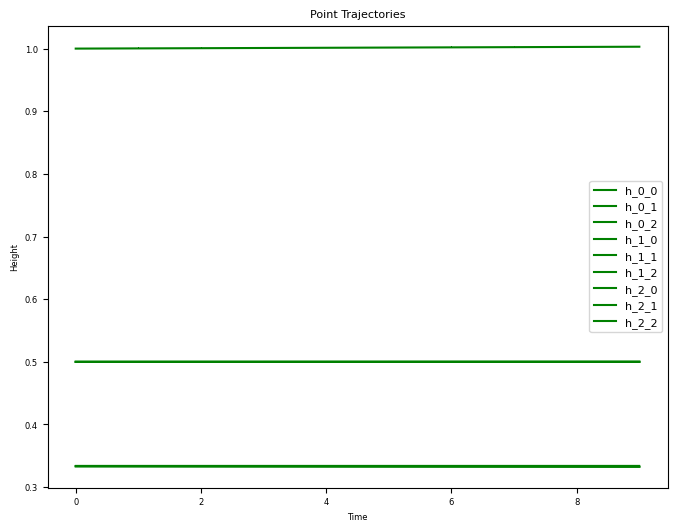

2023-12-22 22:28:28,716 - funman.api.run - INFO - Creating plot of parameter space: ./out/77a58191-8b6d-4bdb-a952-081a6ff38852_parameter_space.png


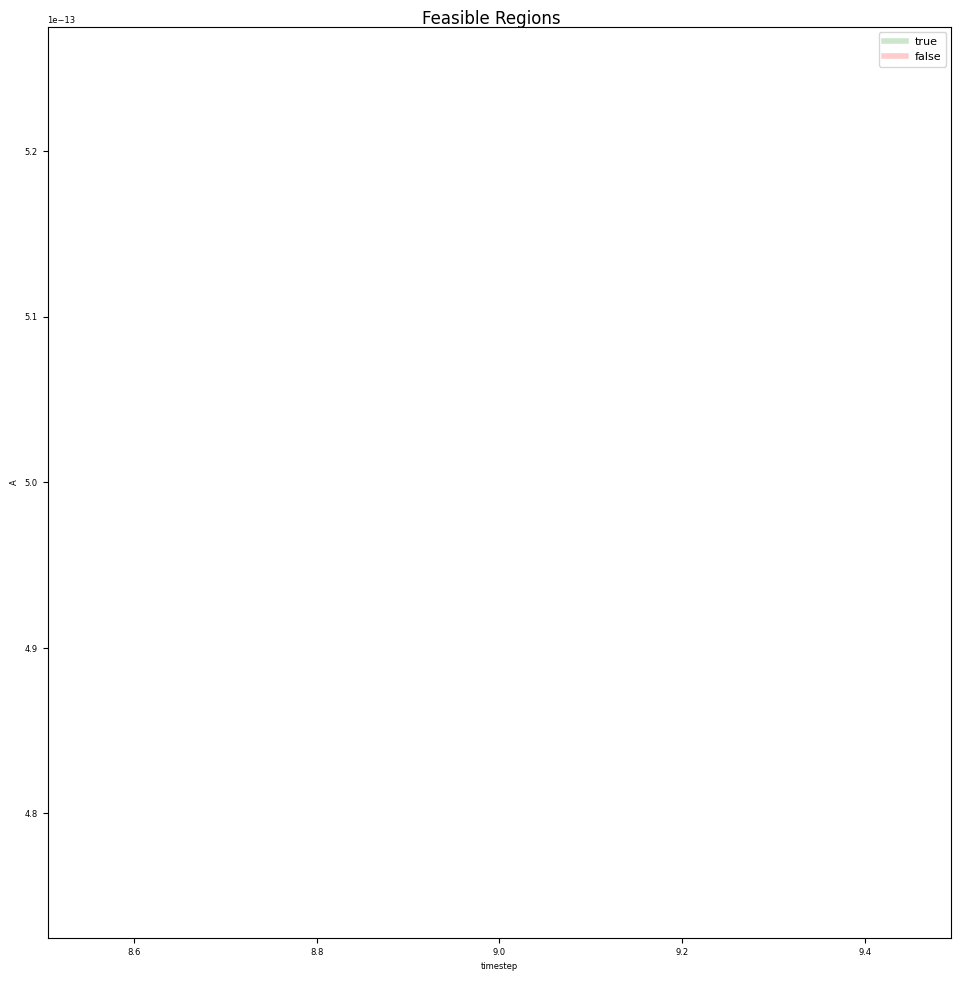

2023-12-22 22:28:29,273 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2023-12-22 22:28:29,469 - funman.server.worker - INFO - FunmanWorker exiting...
2023-12-22 22:28:29,473 - funman.server.worker - INFO - Worker.stop() completed.


1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {A[1.0000000000000001e-20, 1.0000000000000002e-12): 5.000000050000001e-13}
{A[1.0000000000000001e-20, 1.0000000000000002e-12): 5.000000050000001e-13}
                 A     h_0_0     h_0_1     h_0_2     h_0_3     h_0_4  \
time                                                                   
0.0   5.000000e-13  0.333333  0.333333  0.333333  0.333333  0.333333   
1.0   5.000000e-13  0.333333  0.333333  0.333251  0.333333  0.333333   
2.0   5.000000e-13  0.333333  0.333333  0.333169  0.333333  0.333333   
3.0   5.000000e-13  0.333333  0.333334  0.333086  0.333334  0.333333   
4.0   5.000000e-13  0.333333  0.333334  0.333003  0.333334  0.333333   
5.0   5.000000e-13  0.333333  0.333334  0.332920  0.333334  0.333333   
6.0   5.000000e-13  0.333333  0.333334  0.332836  0.333334  0.333333   
7.0   5.000000e-13  0.333333  0.333334  0.332752  0.333334  0.333333   
8.0   5.000000e-13  0.333333  0.333334  0.332668  0.333334  0.333333   
9.0  

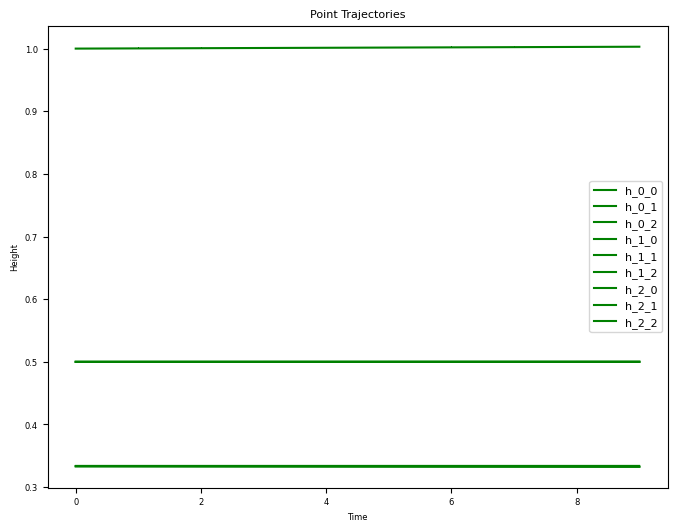

In [17]:
# Use a five point 2d model 

num_disc = 3

# MODEL_PATH = os.path.join("../", f"halfar.json")
MODEL_PATH = os.path.join("../", "resources/amr/halfar/halfar_5x5_0_boundary.json")

variables = [f"h_{d1}_{d2}" for d1 in range(num_disc) for d2 in range(num_disc)]
height_bounds = [
            {"name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 1.01}
         }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"any",
        #  "interval": {"lb":1e-20, "ub":1e-12}}
         "interval": {"lb":1e-20, "ub":1e-12}}
        # "interval": {"lb":0, "ub":1}}
    ],
    "constraints": height_bounds + 
    [
        # {"name": "LHS_slope",
        #     "variables": ["h_1", "h_0"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }, 
        # {"name": "RHS_slope",
        #     "variables": ["h_3", "h_4"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        # "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        # "tolerance": 1e-3,
        "verbosity": 10,
        # "dreal_mcts": False,
        # "dreal_precision": 1,
        "save_smtlib": "./out",
        # "substitute_subformulas": False,
        # "series_approximation_threshold": None,
        # "dreal_log_level": "info",
        # "profile": False,
    },
}


# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None,
    
)

summarize_results(variables, results)




2023-12-22 22:35:03,139 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>
2023-12-22 22:35:03,154 - matplotlib.animation - INFO - figure size in inches has been adjusted from 6.4 x 4.8 to 6.4 x 4.800000000000001
2023-12-22 22:35:03,157 - matplotlib.animation - DEBUG - frame size in pixels is 640 x 480
2023-12-22 22:35:03,418 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b356d7f40>
2023-12-22 22:35:04,037 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b356136d0>
2023-12-22 22:35:04,646 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b355d0f10>
2023-12-22 22:35:05,241 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b354dea60>
2023-12-22 22:35:05,866 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6b3546ba60>
2023-12-22 22:35:07,125 - matplotlib.color

h                                        
               0         1         2         3         4
time                                                    
0.0  0  0.333333  0.333333  0.333333  0.333333  0.333333
     1  0.333333  0.500000  0.500000  0.500000  0.333333
     2  0.333333  0.500000  1.000000  0.500000  0.333333
     3  0.333333  0.500000  0.500000  0.500000  0.333333
     4  0.333333  0.333333  0.333333  0.333333  0.333333
1.0  0  0.333333  0.333333  0.333251  0.333333  0.333333
     1  0.333333  0.500009  0.500007  0.500009  0.333333
     2  0.333251  0.500007  1.000328  0.500007  0.333251
     3  0.333333  0.500009  0.500007  0.500009  0.333333
     4  0.333333  0.333333  0.333251  0.333333  0.333333
2.0  0  0.333333  0.333333  0.333169  0.333333  0.333333
     1  0.333333  0.500018  0.500014  0.500018  0.333333
     2  0.333169  0.500014  1.000658  0.500014  0.333169
     3  0.333333  0.500018  0.500014  0.500018  0.333333
     4  0.333333  0.333333  0.333169  0.333333  0.333333
3.0  0  0.333333  0.333334  0.333086  0.333334  0.333333
     1  0.333334  0.500027  0.500021  0.500027  0.333334
     2  0.333086  0.500021  1.000989  0.500021  0.333086
     3  0.333334  0.500027  0.500021  0.500027  0.333334
     4  0.333333  0.333334  0.333086  0.333334  0.333333
4.0  0  0.333333  0.333334  0.333003  0.333334  0.333333
     1  0.333334  0.500036  0.500029  0.500036  0.333334
     2  0.333003  0.500029  1.001321  0.500029  0.333003
     3  0.333334  0.500036  0.500029  0.500036  0.333334
     4  0.333333  0.333334  0.333003  0.333334  0.333333
5.0  0  0.333333  0.333334  0.332920  0.333334  0.333333
     1  0.333334  0.500046  0.500036  0.500046  0.333334
     2  0.332920  0.500036  1.001654  0.500036  0.332920
     3  0.333334  0.500046  0.500036  0.500046  0.333334
     4  0.333333  0.333334  0.332920  0.333334  0.333333
6.0  0  0.333333  0.333334  0.332836  0.333334  0.333333
     1  0.333334  0.500055  0.500043  0.500055  0.333334
     2  0.332836  0.500043  1.001989  0.500043  0.332836
     3  0.333334  0.500055  0.500043  0.500055  0.333334
     4  0.333333  0.333334  0.332836  0.333334  0.333333
7.0  0  0.333333  0.333334  0.332752  0.333334  0.333333
     1  0.333334  0.500064  0.500050  0.500064  0.333334
     2  0.332752  0.500050  1.002325  0.500050  0.332752
     3  0.333334  0.500064  0.500050  0.500064  0.333334
     4  0.333333  0.333334  0.332752  0.333334  0.333333
8.0  0  0.333333  0.333334  0.332668  0.333334  0.333333
     1  0.333334  0.500073  0.500057  0.500073  0.333334
     2  0.332668  0.500057  1.002663  0.500057  0.332668
     3  0.333334  0.500073  0.500057  0.500073  0.333334
     4  0.333333  0.333334  0.332668  0.333334  0.333333
9.0  0  0.333333  0.333334  0.332583  0.333334  0.333333
     1  0.333334  0.500082  0.500064  0.500082  0.333334
     2  0.332583  0.500064  1.003001  0.500064  0.332583
     3  0.333334  0.500082  0.500064  0.500082  0.333334
     4  0.333333  0.333334  0.332583  0.333334  0.333333

2023-12-22 22:35:12,439 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f6add2201c0>


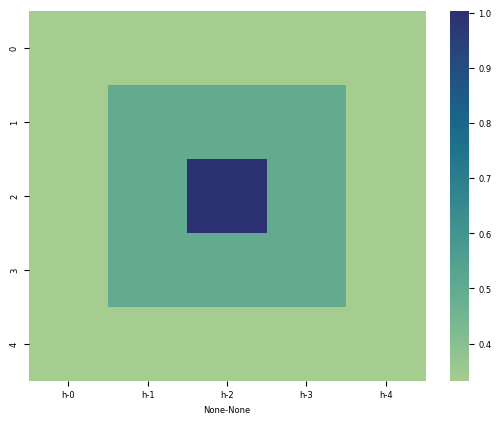

In [18]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import numpy as np
import pandas as pd
from sklearn import preprocessing

df = results.dataframe(points=[results.parameter_space.true_points()[-1]])
steps=len(df)
df = df.drop(columns=["A", "id", "label"])


# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# standard_scaler = preprocessing.StandardScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# # x_scaled = standard_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled, columns =df.columns)



df.columns = df.columns.str.split("_", expand=True)
df = df.stack([1])



def animate_heat_map(my_df, frames):
    fig = plt.figure()

    data = my_df.loc[0,:]
    vmin = my_df.min().min()
    vmax = my_df.max().max()
    # ax = sns.heatmap(data, vmin=0, vmax=1)

    # def init():
    #     plt.clf()
    #     ax = sns.heatmap(data, vmin=0, vmax=1)

    def animate(i):
        plt.clf()
        data = my_df.loc[i,:]
        ax = sns.heatmap(data, vmin=vmin, vmax=vmax, cmap="crest")

    anim = animation.FuncAnimation(fig, animate, #init_func=init, 
    interval=1000, frames=frames)

    return anim
    


anim = animate_heat_map(df, steps)
HTML(anim.to_jshtml())

df

In [ ]:
# Advection Model

num_disc = 5

# MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_forward.json")
MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_backward.json")
# MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_centered.json")

height_bounds = [
            {"name": f"pos_u_{i}",
         "variable": f"u_{i}",
         "interval": {"lb": 0}
         }
    for i in range(num_disc)
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 5, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "dx",
         "label":"any",
        #  "interval": {"lb":1e-18, "ub":1e-14}}
        "interval": {"lb":1e-1, "ub":1}},
        {"name": "a",
         "label":"any",
        #  "interval": {"lb":1e-18, "ub":1e-14}}
        "interval": {"lb":-1, "ub":1}}
    ],
    "constraints": 
    height_bounds + 
    [

        # 0 <= dx - a
        # a <= dx
        {"name": "dx_gte_a",
            "variables": ["dx", "a"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            # "timepoints": {"lb": 0}
        }, 
    #     {"name": "RHS_slope",
    #         "variables": ["h_8", "h_9"],
    #         "weights": [1, -1],
    #         "additive_bounds": {"lb": 0},
    #         "timepoints": {"lb": 0}
    #     }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-2,
        "verbosity": 20,
        "dreal_mcts": True,
        # "dreal_precision": 1,
        "save_smtlib": "./out",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"u_{d}" for d in range(num_disc)]

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["a", "dx", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables
    #,"label_color":{"true": "g", "false":"r"}
    },
    num_points=None
)

summarize_results(variables, results)




In [ ]:
# Centered

#         a   dx  id label      u_0       u_1       u_2        u_3       u_4
# time                                                                      
# 0.0   0.5  0.1   0  true   0.1000    0.5000   1.00000    0.50000   0.10000
# 1.0   0.5  0.1   0  true  -1.1500   -1.7500   1.00000    3.00000   1.35000
# 2.0   0.5  0.1   0  true   3.2250   -7.1250 -10.87500    5.50000   8.85000
# 3.0   0.5  0.1   0  true  21.0375   28.1250 -42.43750  -21.68750  22.60000
# 4.0   0.5  0.1   0  true -49.2750  186.8125  82.09375 -127.78125 -31.61875

# Forward 

#         a   dx  id label     u_0     u_1    u_2    u_3    u_4
# time                                                         
# 0.0   0.5  0.1   0  true     0.1     0.5    1.0    0.5    0.1
# 1.0   0.5  0.1   0  true    -1.9    -2.0    3.5    2.5    0.6
# 2.0   0.5  0.1   0  true    -1.4   -29.5    8.5   12.0    3.6
# 3.0   0.5  0.1   0  true   139.1  -219.5   -9.0   54.0   21.6
# 4.0   0.5  0.1   0  true  1932.1 -1272.0 -324.0  216.0  129.6


# Backward 

#         a   dx  id label   u_0           u_1    u_2    u_3    u_4
# time                                                             
# 0.0   0.5  0.1   0  true   0.1  5.000000e-01    1.0    0.5    0.1
# 1.0   0.5  0.1   0  true  -0.4 -1.500000e+00   -1.5    3.0    2.6
# 2.0   0.5  0.1   0  true   1.6  4.000000e+00   -1.5  -19.5   17.6
# 3.0   0.5  0.1   0  true  -6.4 -8.000000e+00   26.0   70.5  -79.9
# 4.0   0.5  0.1   0  true  25.6 -1.243450e-14 -144.0 -152.0  272.6